<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 29 Project</h1>
</div>

Each day, The United States Department of Treasury releases Treasury Yield Curve rates. Traders and other market participants need to track this release and be able to understand how it's changed. 

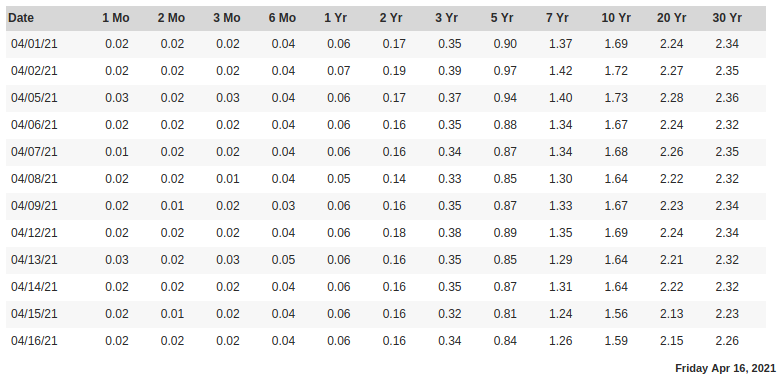

**Treasury Yield Curve Rates**: "These rates are commonly referred to as "Constant Maturity Treasury" rates, or CMTs. Yields are interpolated by the Treasury from the daily yield curve. This curve, which relates the yield on a security to its time to maturity is based on the closing market bid yields on actively traded Treasury securities in the over-the-counter market. These market yields are calculated from composites of indicative, bid-side market quotations (not actual transactions) obtained by the Federal Reserve Bank of New York at or near 3:30 PM each trading day. The CMT yield values are read from the yield curve at fixed maturities, currently 1, 2, 3 and 6 months and 1, 2, 3, 5, 7, 10, 20, and 30 years. This method provides a yield for a 10 year maturity, for example, even if no outstanding security has exactly 10 years remaining to maturity."

**Project Task: Create a python script that scrapes this data from the Treasury's website and produces a matplotlib chart of the current yield curve. Submit your project as a git repository containing all necessary files.**

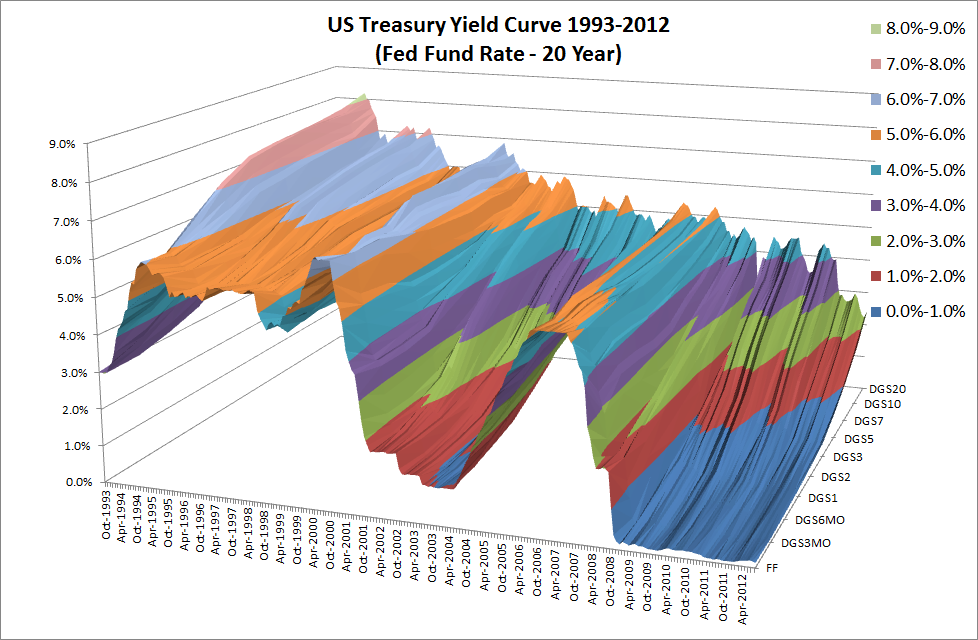

Create a blank skeleton of your project. Commit the files to git. Then create a branch called `feature` and work on your changes there. Commit your code frequently and be sure to include useful messages to describe what changes you've made. When you're done working on your project, commit the changes to the `feature` branch and then merge it into `main`.

Requirements:
* Include the correct files:
  - `.gitignore` - with irrelevant files ignored
  - `requirements.txt` - with correct dependencies
  - `script.py` - containing your code
  - `README.md` - containing information about your project
  - `/charts` - containing charts you've created with matplotlib
* Git repo with correct flow:
  - commit skeleton to main
  - work on changes in `feature` branch
  - commit to `feature` often
  - when finished, merge `feature` into `main`.
* Project updates automatically (pulls newest data and produces latest chart when ran).
  - ensure that files/charts created have correct filename (include dates).

Optional:
* Use sqlite to store yield curve rates before creating charts
* Create a flask or django application that displays the image of the chart
* Get approved alternative data to scrape/chart. 

Treasury link: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'

def yield_curve(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    table = soup.find("table", attrs= {"class":"t-chart"}) 
    rows = table.find_all('tr')
    th_td_list = []
    for row in rows[1:]:
        tds = row.findAll('td')
        th_td_data_row = []
        for td in tds:
            td_text = td.text.strip()
            #print(td_text)
#             if td_text == '':
#                 td_text = 0.0      
#             else:
#                 td_text = td_text
            th_td_data_row.append(td_text)
        th_td_list.append(th_td_data_row)
        #print(th_td_list)
    return th_td_list

yield_curve(url)


[['04/01/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.17',
  '0.35',
  '0.90',
  '1.37',
  '1.69',
  '2.24',
  '2.34'],
 ['04/02/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.07',
  '0.19',
  '0.39',
  '0.97',
  '1.42',
  '1.72',
  '2.27',
  '2.35'],
 ['04/05/21',
  '0.03',
  '0.02',
  '0.03',
  '0.04',
  '0.06',
  '0.17',
  '0.37',
  '0.94',
  '1.40',
  '1.73',
  '2.28',
  '2.36'],
 ['04/06/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.16',
  '0.35',
  '0.88',
  '1.34',
  '1.67',
  '2.24',
  '2.32'],
 ['04/07/21',
  '0.01',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.16',
  '0.34',
  '0.87',
  '1.34',
  '1.68',
  '2.26',
  '2.35'],
 ['04/08/21',
  '0.02',
  '0.02',
  '0.01',
  '0.04',
  '0.05',
  '0.14',
  '0.33',
  '0.85',
  '1.30',
  '1.64',
  '2.22',
  '2.32'],
 ['04/09/21',
  '0.02',
  '0.01',
  '0.02',
  '0.03',
  '0.06',
  '0.16',
  '0.35',
  '0.87',
  '1.33',
  '1.67',
  '2.23',
  '2.34'],
 ['04/12/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
 

In [33]:
data = yield_curve(url)
df = pd.DataFrame(data, columns= ["Date", "1Mo", "2Mo", "3Mo", "6Mo", "1Yr","2Yr", 
                                  "3Yr","5Yr","7Yr", "10Yr", "20Yr", "30Yr"])
df

Date   1Mo   2Mo   3Mo   6Mo   1Yr   2Yr   3Yr   5Yr   7Yr  10Yr  \
0   04/01/21  0.02  0.02  0.02  0.04  0.06  0.17  0.35  0.90  1.37  1.69   
1   04/02/21  0.02  0.02  0.02  0.04  0.07  0.19  0.39  0.97  1.42  1.72   
2   04/05/21  0.03  0.02  0.03  0.04  0.06  0.17  0.37  0.94  1.40  1.73   
3   04/06/21  0.02  0.02  0.02  0.04  0.06  0.16  0.35  0.88  1.34  1.67   
4   04/07/21  0.01  0.02  0.02  0.04  0.06  0.16  0.34  0.87  1.34  1.68   
5   04/08/21  0.02  0.02  0.01  0.04  0.05  0.14  0.33  0.85  1.30  1.64   
6   04/09/21  0.02  0.01  0.02  0.03  0.06  0.16  0.35  0.87  1.33  1.67   
7   04/12/21  0.02  0.02  0.02  0.04  0.06  0.18  0.38  0.89  1.35  1.69   
8   04/13/21  0.03  0.02  0.03  0.05  0.06  0.16  0.35  0.85  1.29  1.64   
9   04/14/21  0.02  0.02  0.02  0.04  0.06  0.16  0.35  0.87  1.31  1.64   
10  04/15/21  0.02  0.01  0.02  0.04  0.06  0.16  0.32  0.81  1.24  1.56   
11  04/16/21  0.02  0.02  0.02  0.04  0.06  0.16  0.34  0.84  1.26  1.59   
12  04/19/21  0.01  0.02  0.02  0.04  0.08  0.16  0.34  0.85  1.28  1.61   
13  04/20/21  0.01  0.02  0.03  0.04  0.07  0.15  0.31  0.81  1.25  1.58   
14  04/21/21  0.00  0.02  0.03  0.04  0.07  0.15  0.32  0.81  1.24  1.57   

    20Yr  30Yr  
0   2.24  2.34  
1   2.27  2.35  
2   2.28  2.36  
3   2.24  2.32  
4   2.26  2.35  
5   2.22  2.32  
6   2.23  2.34  
7   2.24  2.34  
8   2.21  2.32  
9   2.22  2.32  
10  2.13  2.23  
11  2.15  2.26  
12  2.18  2.29  
13  2.16  2.27  
14  2.16  2.26